<a href="https://colab.research.google.com/github/d9ria/AB-Tests-Practice/blob/main/7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

In [3]:
data = pd.read_csv('hw_aa.csv', delimiter=';')
data.head()

,Unnamed: 0,uid,experimentVariant,version,purchase
0,1,c4ca4238a0b923820dcc509a6f75849b,1,v2.8.0,0
1,2,c81e728d9d4c2f636f067f89cc14862c,0,v2.9.0,0
2,3,eccbc87e4b5ce2fe28308fd9f2a7baf3,1,v2.9.0,0
3,4,a87ff679a2f3e71d9181a67b7542122c,1,v2.8.0,0
4,5,e4da3b7fbbce2345d7772b0674a318d5,1,v2.8.0,0


  0%|          | 0/1000 [00:00<?, ?it/s]

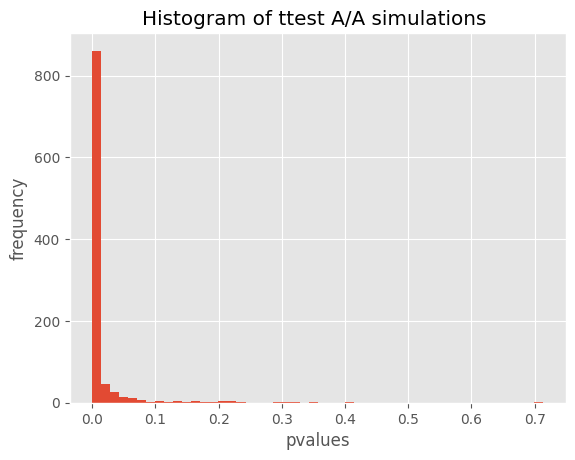

0.94

In [7]:
simulations = 1000
n_s = 1000
res = []

for i in tqdm(range(simulations)):
    s1 = data.query("experimentVariant == 1").purchase.sample(n_s, replace = False).values
    s2 = data.query("experimentVariant == 0").purchase.sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

sum(np.array(res) < 0.05) / simulations

In [8]:
data.groupby(['version','experimentVariant']).purchase.mean()

version   experimentVariant
v2.8.0    0                    0.000993
          1                    0.045606
v2.9.0    0                    0.074658
          1                    0.071304
v3.7.4.0  0                    0.059943
          1                    0.063018
v3.8.0.0  0                    0.057604
          1                    0.062848
Name: purchase, dtype: float64

  0%|          | 0/1000 [00:00<?, ?it/s]

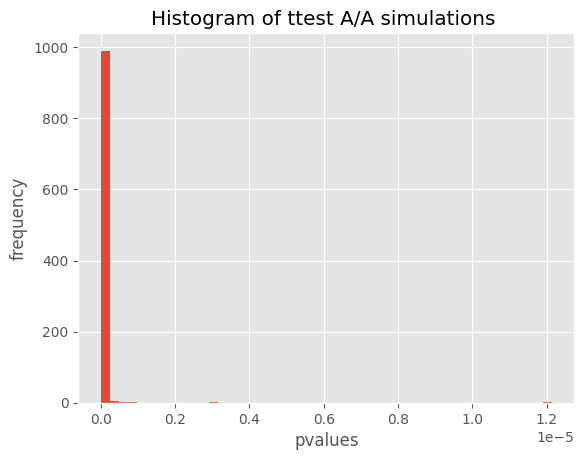

1.0

In [9]:
simulations = 1000
n_s = 1000
res = []

for i in tqdm(range(simulations)):
    s1 = data.query("(experimentVariant == 1) & (version == 'v2.8.0')").purchase.sample(n_s, replace = False).values
    s2 = data.query("(experimentVariant == 0) & (version == 'v2.8.0')").purchase.sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

sum(np.array(res) < 0.05) / simulations

  0%|          | 0/1000 [00:00<?, ?it/s]

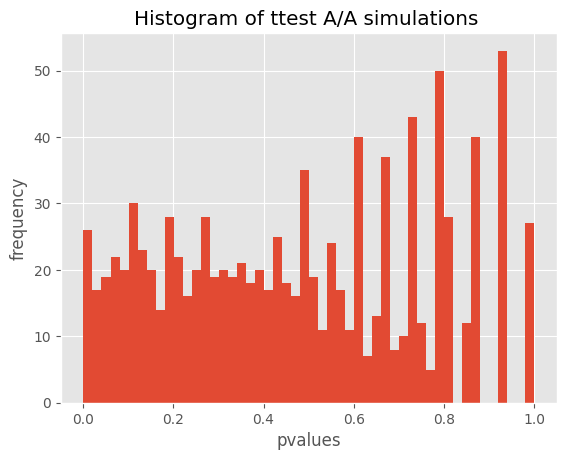

0.055

In [10]:
simulations = 1000
n_s = 1000
res = []

for i in tqdm(range(simulations)):
    s1 = data.query("(experimentVariant == 1) & (version == 'v2.9.0')").purchase.sample(n_s, replace = False).values
    s2 = data.query("(experimentVariant == 0) & (version == 'v2.9.0')").purchase.sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

sum(np.array(res) < 0.05) / simulations

  0%|          | 0/1000 [00:00<?, ?it/s]

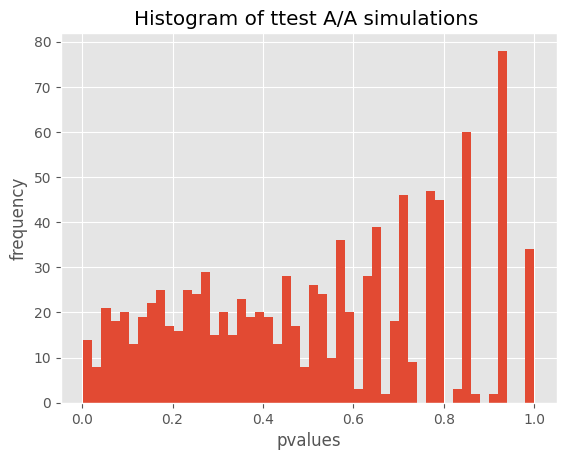

0.032

In [11]:
simulations = 1000
n_s = 1000
res = []

for i in tqdm(range(simulations)):
    s1 = data.query("(experimentVariant == 1) & (version == 'v3.7.4.0')").purchase.sample(n_s, replace = False).values
    s2 = data.query("(experimentVariant == 0) & (version == 'v3.7.4.0')").purchase.sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

sum(np.array(res) < 0.05) / simulations

  0%|          | 0/1000 [00:00<?, ?it/s]

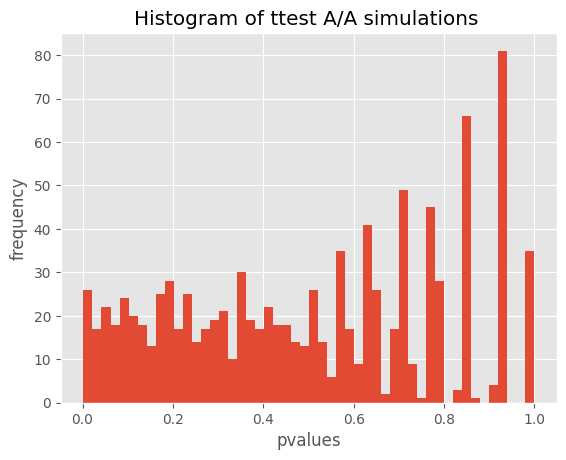

0.053

In [12]:
simulations = 1000
n_s = 1000
res = []

for i in tqdm(range(simulations)):
    s1 = data.query("(experimentVariant == 1) & (version == 'v3.8.0.0')").purchase.sample(n_s, replace = False).values
    s2 = data.query("(experimentVariant == 0) & (version == 'v3.8.0.0')").purchase.sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

sum(np.array(res) < 0.05) / simulations

Excluding the version with a p-value < 0.05 from the main dataframe. Then reruning the FPR calculation for the A/A test.

In [13]:
data = data[data['version'] != 'v2.8.0']

  0%|          | 0/1000 [00:00<?, ?it/s]

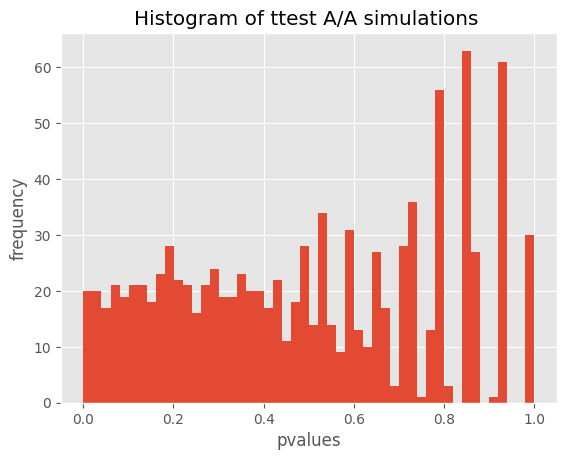

0.048

In [14]:
simulations = 1000
n_s = 1000
res = []

for i in tqdm(range(simulations)):
    s1 = data.query("experimentVariant == 1").purchase.sample(n_s, replace = False).values
    s2 = data.query("experimentVariant == 0").purchase.sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

sum(np.array(res) < 0.05) / simulations